In [0]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import *

spark = SparkSession.\
builder.\
master('local').\
appName('productRevenue').\
getOrCreate()

In [0]:
df1 = spark.read.option('header',True).csv("dbfs:/FileStore/shared_uploads/alwanigirish82@gmail.com/3131.csv")


In [0]:
df1.show()

+----------+-------+-------+-------+-------+------+
|  datetime|   open|   high|    low|  close|volume|
+----------+-------+-------+-------+-------+------+
|2006-01-02|4566.95|4601.35| 4542.0|4556.25|   0.0|
|2006-01-03|4531.45|4605.45|4531.45|4600.25|   0.0|
|2006-01-04|4619.55| 4707.6|4616.05|4694.14|   0.0|
|2006-01-05| 4714.2|4782.64|4670.55|4760.45|   0.0|
|2006-01-06|4767.25| 4802.8| 4703.1| 4755.6|   0.0|
|2006-01-09| 4758.1|4777.05| 4676.1| 4695.6|   0.0|
|2006-01-10| 4698.8|4724.85| 4617.6| 4629.1|   0.0|
|2006-01-12|4629.64| 4659.0| 4592.0|4635.35|   0.0|
|2006-01-13|4634.25|4672.14|4589.45|4602.55|   0.0|
|2006-01-16|4602.95|4615.95| 4533.8|4558.14|   0.0|
|2006-01-17|4556.35| 4604.6|4491.89|4504.05|   0.0|
|2006-01-18| 4442.8|4493.55|4385.64|4441.75|   0.0|
|2006-01-19|4447.64| 4513.6|4447.64| 4489.0|   0.0|
|2006-01-20| 4550.8| 4553.8|4490.89|4509.39|   0.0|
|2006-01-23|4510.85|4529.35|4462.14| 4491.7|   0.0|
|2006-01-24|4494.85|4546.35| 4484.2| 4492.3|   0.0|
|2006-01-25|

In [0]:
df1.registerTempTable("sample_table")

In [0]:



monthly_data=spark.sql(""" select year(datetime) as year,month(datetime) as month, date_format(datetime,'MMM') as month_name,avg(open),avg(high),avg(low),avg(close) from sample_table group by year(datetime),month(datetime),date_format(datetime,'MMM') order by year(datetime),month(datetime),date_format(datetime,'MMM') """)
monthly_data.show(1000)

+----+-----+----------+-------------------------+-------------------------+------------------------+--------------------------+
|year|month|month_name|avg(CAST(open AS DOUBLE))|avg(CAST(high AS DOUBLE))|avg(CAST(low AS DOUBLE))|avg(CAST(close AS DOUBLE))|
+----+-----+----------+-------------------------+-------------------------+------------------------+--------------------------+
|2006|    1|       Jan|        4589.339000000001|        4637.208500000001|      4551.8775000000005|         4589.843000000001|
|2006|    2|       Feb|        4506.143157894738|         4552.65105263158|       4458.262105263158|         4505.006315789474|
|2006|    3|       Mar|        4652.009545454545|        4690.850454545455|       4616.552272727273|         4649.253181818182|
|2006|    4|       Apr|        4607.854444444445|        4665.305555555556|       4544.958333333333|          4600.32388888889|
|2006|    5|       May|        4634.159545454545|       4710.9686363636365|       4521.668636363636|    

In [0]:

%sql

with sample_table as
( select year(datetime) as year, lpad(month(datetime),2,0) as month,date_format(datetime,'MMM') as month_name, round(avg(open),2) as monthly_open,round(avg(high),2) as monthly_high,round(avg(low),2) as monthly_low,round(avg(close),2) as monthly_close from sample_table group by year(datetime),month(datetime),date_format(datetime,'MMM') order by year(datetime),month(datetime),date_format(datetime,'MMM') )

select concat(lpad(month,2,0),'-',year) as month_year, *  from sample_table

month_year,year,month,month_name,monthly_open,monthly_high,monthly_low,monthly_close
01-2006,2006,01,Jan,4589.34,4637.21,4551.88,4589.84
02-2006,2006,02,Feb,4506.14,4552.65,4458.26,4505.01
03-2006,2006,03,Mar,4652.01,4690.85,4616.55,4649.25
04-2006,2006,04,Apr,4607.85,4665.31,4544.96,4600.32
05-2006,2006,05,May,4634.16,4710.97,4521.67,4609.69
06-2006,2006,06,Jun,3798.77,3856.71,3706.08,3774.53
07-2006,2006,07,Jul,3719.89,3773.22,3661.0,3727.14
08-2006,2006,08,Aug,4339.43,4390.05,4302.44,4355.97
09-2006,2006,09,Sep,4850.97,4911.31,4800.01,4866.77
10-2006,2006,10,Oct,5342.82,5404.21,5298.4,5355.58


In [0]:
final_df=spark.sql("""with sample_table as
( select year(datetime) as year, lpad(month(datetime),2,0) as month,date_format(datetime,'MMM') as month_name, round(avg(open),2) as monthly_open,round(avg(high),2) as monthly_high,round(avg(low),2) as monthly_low,round(avg(close),2) as monthly_close from sample_table group by year(datetime),month(datetime),date_format(datetime,'MMM') order by year(datetime),month(datetime),date_format(datetime,'MMM') )

select concat(lpad(month,2,0),'-',year) as month_year ,*,((monthly_close-monthly_open)/(monthly_open))*100 as monthly_percent_return from sample_table """)

final_df.show()

+----------+----+-----+----------+------------+------------+-----------+-------------+----------------------+
|month_year|year|month|month_name|monthly_open|monthly_high|monthly_low|monthly_close|monthly_percent_return|
+----------+----+-----+----------+------------+------------+-----------+-------------+----------------------+
|   01-2006|2006|   01|       Jan|     4589.34|     4637.21|    4551.88|      4589.84|  0.010894812761747877|
|   02-2006|2006|   02|       Feb|     4506.14|     4552.65|    4458.26|      4505.01|  -0.02507689508093...|
|   03-2006|2006|   03|       Mar|     4652.01|     4690.85|    4616.55|      4649.25|  -0.05932919318746...|
|   04-2006|2006|   04|       Apr|     4607.85|     4665.31|    4544.96|      4600.32|  -0.16341677788991946|
|   05-2006|2006|   05|       May|     4634.16|     4710.97|    4521.67|      4609.69|   -0.5280352857907422|
|   06-2006|2006|   06|       Jun|     3798.77|     3856.71|    3706.08|      3774.53|    -0.638101280151201|
|   07-200

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
df=final_df.toPandas()
df

,month_year,year,month,month_name,monthly_open,monthly_high,monthly_low,monthly_close,monthly_percent_return
0,01-2006,2006,01,Jan,4589.34,4637.21,4551.88,4589.84,0.010895
1,02-2006,2006,02,Feb,4506.14,4552.65,4458.26,4505.01,-0.025077
2,03-2006,2006,03,Mar,4652.01,4690.85,4616.55,4649.25,-0.059329
3,04-2006,2006,04,Apr,4607.85,4665.31,4544.96,4600.32,-0.163417
4,05-2006,2006,05,May,4634.16,4710.97,4521.67,4609.69,-0.528035
...,...,...,...,...,...,...,...,...,...
163,08-2019,2019,08,Aug,27929.46,28122.83,27571.90,27847.37,-0.293919
164,09-2019,2019,09,Sep,28179.13,28563.92,27881.97,28238.42,0.210404
165,10-2019,2019,10,Oct,28944.36,29210.98,28585.79,28884.21,-0.207813
166,11-2019,2019,11,Nov,31031.78,31244.46,30847.37,31077.70,0.147977


In [0]:
final_df2=df.pivot(index='year', columns='month', values='monthly_percent_return')
final_df2

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2006,0.010895,-0.025077,-0.059329,-0.163417,-0.528035,-0.638101,0.194898,0.381156,0.325708,0.238825,0.291493,-0.556168
2007,-0.388111,-0.556730,-0.121957,0.494104,0.427683,0.205681,0.017473,-0.205248,0.795960,0.588533,-0.000218,0.049833
2008,-0.426472,-0.444210,-1.283802,0.454249,-0.707064,-0.767976,0.408194,0.457133,0.159840,-1.062941,-0.352408,0.581891
2009,-0.480586,0.256067,-0.135239,1.087936,0.830529,-0.278516,-0.133160,-0.168264,0.619036,-0.202723,0.282794,0.078110
2010,-0.218772,0.054752,0.285763,0.143185,-0.333954,0.082276,0.279516,0.243352,0.564115,-0.259713,-0.375921,-0.180061
2011,-0.637208,-0.192684,0.509258,-0.189929,-0.265483,0.163359,-0.218265,-0.682019,-0.069896,-0.179213,-0.720046,-0.454882
2012,0.686472,0.053829,-0.382237,-0.035584,-0.079197,0.299479,-0.169089,-0.173556,0.440175,-0.195046,0.233785,-0.006707
2013,-0.065041,-0.518220,-0.109223,0.440286,0.051042,-0.291210,-0.578728,-0.535606,-0.180288,0.666347,-0.227430,-0.171292
2014,-0.383793,0.203710,0.615241,-0.048308,0.197023,0.024460,-0.252448,0.114978,-0.110626,0.343112,0.293945,-0.076204


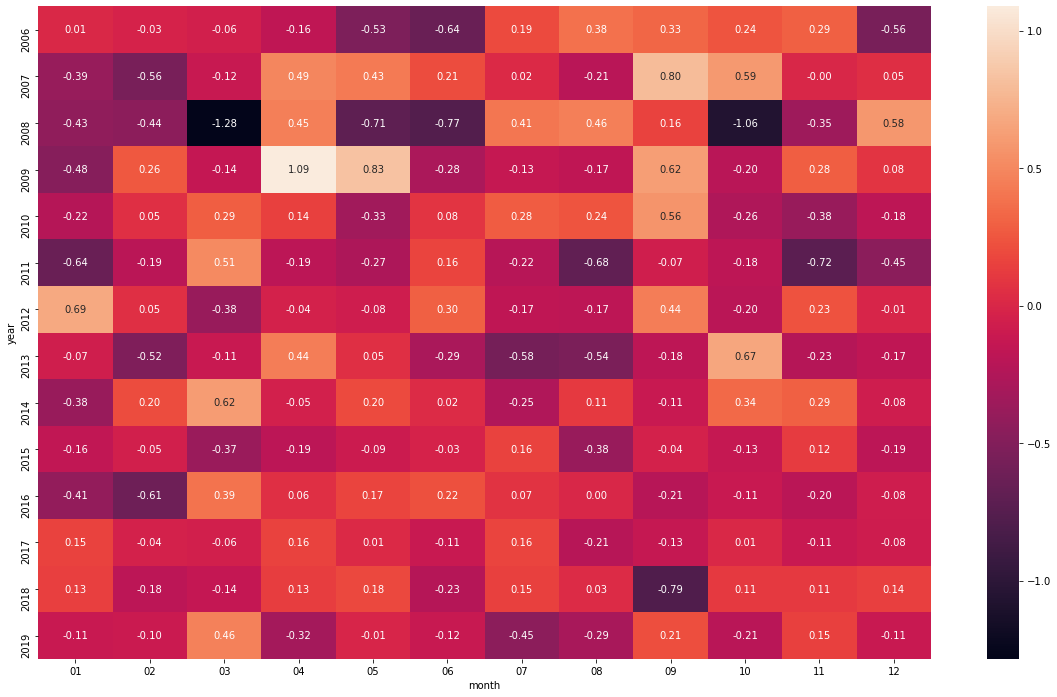

In [0]:
plt.figure(figsize = (20,12))
ax = sns.heatmap(final_df2, annot=True, fmt=".2f")

In [0]:
#EDA

final_df2.describe()

month,01,02,03,04,05,06,07,08,09,10,11,12
count,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000,14.000000
mean,-0.164041,-0.153553,-0.028583,0.144475,-0.010040,-0.104921,-0.025335,-0.101451,0.113445,-0.028654,-0.035170,-0.075473
std,0.340894,0.279556,0.486826,0.372607,0.387413,0.316359,0.283708,0.329656,0.416587,0.425104,0.306981,0.267823
min,-0.637208,-0.610266,-1.283802,-0.319635,-0.707064,-0.767976,-0.578728,-0.682019,-0.786523,-1.062941,-0.720046,-0.556168
25%,-0.403961,-0.381328,-0.139789,-0.134640,-0.221677,-0.265682,-0.205971,-0.273394,-0.125831,-0.200804,-0.219762,-0.177869
50%,-0.188240,-0.076103,-0.084357,0.093667,0.001260,-0.071328,0.044470,-0.170910,0.061450,-0.124443,0.057281,-0.080756
75%,-0.008089,0.034103,0.365156,0.369966,0.180649,0.143088,0.163026,0.094021,0.411559,0.207267,0.212333,0.035698
max,0.686472,0.256067,0.615241,1.087936,0.830529,0.299479,0.408194,0.457133,0.795960,0.666347,0.293945,0.581891


In [0]:
final_df2.describe().T

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
01,14.0,-0.164041,0.340894,-0.637208,-0.403961,-0.188240,-0.008089,0.686472
02,14.0,-0.153553,0.279556,-0.610266,-0.381328,-0.076103,0.034103,0.256067
03,14.0,-0.028583,0.486826,-1.283802,-0.139789,-0.084357,0.365156,0.615241
04,14.0,0.144475,0.372607,-0.319635,-0.134640,0.093667,0.369966,1.087936
05,14.0,-0.010040,0.387413,-0.707064,-0.221677,0.001260,0.180649,0.830529
06,14.0,-0.104921,0.316359,-0.767976,-0.265682,-0.071328,0.143088,0.299479
07,14.0,-0.025335,0.283708,-0.578728,-0.205971,0.044470,0.163026,0.408194
08,14.0,-0.101451,0.329656,-0.682019,-0.273394,-0.170910,0.094021,0.457133
09,14.0,0.113445,0.416587,-0.786523,-0.125831,0.061450,0.411559,0.795960


In [0]:
final_df2.shape

Out[130]: (14, 12)

In [0]:
final_df2.head(5)

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2006,0.010895,-0.025077,-0.059329,-0.163417,-0.528035,-0.638101,0.194898,0.381156,0.325708,0.238825,0.291493,-0.556168
2007,-0.388111,-0.556730,-0.121957,0.494104,0.427683,0.205681,0.017473,-0.205248,0.795960,0.588533,-0.000218,0.049833
2008,-0.426472,-0.444210,-1.283802,0.454249,-0.707064,-0.767976,0.408194,0.457133,0.159840,-1.062941,-0.352408,0.581891
2009,-0.480586,0.256067,-0.135239,1.087936,0.830529,-0.278516,-0.133160,-0.168264,0.619036,-0.202723,0.282794,0.078110
2010,-0.218772,0.054752,0.285763,0.143185,-0.333954,0.082276,0.279516,0.243352,0.564115,-0.259713,-0.375921,-0.180061


In [0]:
final_df2.tail(5)

month,01,02,03,04,05,06,07,08,09,10,11,12
year,,,,,,,,,,,,
2015,-0.157707,-0.053827,-0.372508,-0.186582,-0.090260,-0.030885,0.160806,-0.381213,-0.036940,-0.134201,0.123564,-0.187863
2016,-0.409244,-0.610266,0.391621,0.058568,0.170660,0.223384,0.071467,0.003566,-0.211834,-0.114685,-0.196756,-0.079224
2017,0.153025,-0.036509,-0.059491,0.159007,0.013276,-0.111772,0.163766,-0.211820,-0.130900,0.005766,-0.107941,-0.082288
2018,0.134923,-0.182204,-0.141306,0.128766,0.183978,-0.227180,0.148078,0.031152,-0.786523,0.112594,0.114780,0.141491
2019,-0.114950,-0.098380,0.463045,-0.319635,-0.010756,-0.121892,-0.447198,-0.293919,0.210404,-0.207813,0.147977,-0.113260


---------------------------------------------------------------------------
AttributeError                            Traceback (most recent call last)
<command-3281931328486187> in <module>
----> 1 final_df2.year.unique()

/databricks/python/lib/python3.8/site-packages/pandas/core/generic.py in __getattr__(self, name)
   5463             if self._info_axis._can_hold_identifiers_and_holds_name(name):
   5464                 return self[name]
-> 5465             return object.__getattribute__(self, name)
   5466 
   5467     def __setattr__(self, name: str, value) -> None:

AttributeError: 'DataFrame' object has no attribute 'year'